In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

data_matrix = pd.read_csv('/content/drive/My Drive/CSC373_DMP_Mayr_Jack/DMP_Final/bank_transactions.csv')
data_matrix

Mounted at /content/drive


,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,month=may,month=jun,month=jul,month=aug,month=oct,month=nov,month=dec,month=mar,month=apr,month=sep,day_of_week=mon,day_of_week=tue,day_of_week=wed,day_of_week=thu,day_of_week=fri,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,class
0,0.209877,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.027654,0.127273,1.0,0.000000,1,0,0,1.000000,0.882307,0.376569,0.980730,1.000000,0
1,0.296296,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.017080,0.072727,1.0,0.000000,1,0,0,1.000000,0.484412,0.615063,0.981183,1.000000,0
2,0.246914,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.028060,0.090909,1.0,0.000000,1,0,0,0.937500,0.698753,0.602510,0.957379,0.859735,0
3,0.160494,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.043310,0.018182,1.0,0.142857,0,1,0,0.333333,0.269680,0.192469,0.150759,0.512287,0
4,0.530864,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.110817,0.000000,1.0,0.000000,1,0,0,0.333333,0.340608,0.154812,0.174790,0.512287,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.271605,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.061814,0.000000,1.0,0.000000,1,0,0,0.333333,0.269680,0.192469,0.158694,0.512287,0
41184,0.333333,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.108581,0.018182,1.0,0.000000,1,0,0,0.687500,0.389322,0.368201,0.767853,0.877883,1
41185,0.172840,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.107361,0.000000,1.0,0.000000,1,0,0,0.937500,0.698753,0.602510,0.956926,0.859735,0
41186,0.148148,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.020943,0.036364,1.0,0.000000,1,0,0,1.000000,0.882307,0.376569,0.980503,1.000000,0


In [3]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float32)

In [4]:
data_matrix = clean_dataset(data_matrix)
data_matrix

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,month=may,month=jun,month=jul,month=aug,month=oct,month=nov,month=dec,month=mar,month=apr,month=sep,day_of_week=mon,day_of_week=tue,day_of_week=wed,day_of_week=thu,day_of_week=fri,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,class
0,0.209877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.027654,0.127273,1.0,0.000000,1.0,0.0,0.0,1.000000,0.882307,0.376569,0.980730,1.000000,0.0
1,0.296296,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.017080,0.072727,1.0,0.000000,1.0,0.0,0.0,1.000000,0.484412,0.615063,0.981183,1.000000,0.0
2,0.246914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.028060,0.090909,1.0,0.000000,1.0,0.0,0.0,0.937500,0.698753,0.602510,0.957379,0.859735,0.0
3,0.160494,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.043310,0.018182,1.0,0.142857,0.0,1.0,0.0,0.333333,0.269680,0.192469,0.150759,0.512287,0.0
4,0.530864,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.110817,0.000000,1.0,0.000000,1.0,0.0,0.0,0.333333,0.340608,0.154812,0.174790,0.512287,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.271605,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.061814,0.000000,1.0,0.000000,1.0,0.0,0.0,0.333333,0.269680,0.192469,0.158694,0.512287,0.0
41184,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.108581,0.018182,1.0,0.000000,1.0,0.0,0.0,0.687500,0.389322,0.368201,0.767853,0.877883,1.0
41185,0.172840,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.107361,0.000000,1.0,0.000000,1.0,0.0,0.0,0.937500,0.698753,0.602510,0.956926,0.859735,0.0
41186,0.148148,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.020943,0.036364,1.0,0.000000,1.0,0.0,0.0,1.000000,0.882307,0.376569,0.980503,1.000000,0.0


In [10]:
clf = IsolationForest(n_estimators=500, max_samples='auto', contamination=0.12, \
                        max_features=1.0, bootstrap=True, n_jobs=-1, random_state=0, verbose=1)
clf.fit(data_matrix.drop(columns = ['class']))
pred = clf.predict(data_matrix.drop(columns = ['class']))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    5.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [11]:
data_matrix['anomaly']=pred

In [12]:
data_matrix

,age,job=housemaid,job=services,job=admin.,job=blue-collar,job=technician,job=retired,job=management,job=unemployed,job=self-employed,job=unknown,job=entrepreneur,job=student,marital=married,marital=single,marital=divorced,marital=unknown,education=basic.4y,education=high.school,education=basic.6y,education=basic.9y,education=professional.course,education=unknown,education=university.degree,education=illiterate,default=0,default=unknown,default=1,housing=0,housing=1,housing=unknown,loan=0,loan=1,loan=unknown,contact=cellular,month=may,month=jun,month=jul,month=aug,month=oct,month=nov,month=dec,month=mar,month=apr,month=sep,day_of_week=mon,day_of_week=tue,day_of_week=wed,day_of_week=thu,day_of_week=fri,duration,campaign,pdays,previous,poutcome=nonexistent,poutcome=failure,poutcome=success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,class,anomaly
0,0.209877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.027654,0.127273,1.0,0.000000,1.0,0.0,0.0,1.000000,0.882307,0.376569,0.980730,1.000000,0.0,1
1,0.296296,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.017080,0.072727,1.0,0.000000,1.0,0.0,0.0,1.000000,0.484412,0.615063,0.981183,1.000000,0.0,1
2,0.246914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.028060,0.090909,1.0,0.000000,1.0,0.0,0.0,0.937500,0.698753,0.602510,0.957379,0.859735,0.0,1
3,0.160494,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.043310,0.018182,1.0,0.142857,0.0,1.0,0.0,0.333333,0.269680,0.192469,0.150759,0.512287,0.0,1
4,0.530864,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.110817,0.000000,1.0,0.000000,1.0,0.0,0.0,0.333333,0.340608,0.154812,0.174790,0.512287,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.271605,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.061814,0.000000,1.0,0.000000,1.0,0.0,0.0,0.333333,0.269680,0.192469,0.158694,0.512287,0.0,1
41184,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.108581,0.018182,1.0,0.000000,1.0,0.0,0.0,0.687500,0.389322,0.368201,0.767853,0.877883,1.0,1
41185,0.172840,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.107361,0.000000,1.0,0.000000,1.0,0.0,0.0,0.937500,0.698753,0.602510,0.956926,0.859735,0.0,1
41186,0.148148,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.020943,0.036364,1.0,0.000000,1.0,0.0,0.0,1.000000,0.882307,0.376569,0.980503,1.000000,0.0,1


In [13]:
algorithm_determined_outliers=data_matrix.loc[data_matrix['anomaly']==-1]
dataset_determined_outliers=data_matrix.loc[data_matrix['class']==1]
alg_outlier_index=list(algorithm_determined_outliers.index)
data_outlier_index=list(dataset_determined_outliers.index)
print(len(alg_outlier_index))
print(len(data_outlier_index))
alg_outlier_index_set = set(alg_outlier_index)
intersection = alg_outlier_index_set.intersection(data_outlier_index)
print(len(intersection))

4943
4640
1579


In [15]:
data_matrix.loc[data_matrix['anomaly'] == 1, data_matrix['anomaly']] = 0
data_matrix.loc[data_matrix['anomaly'] == -1, data_matrix['anomaly']] = 1

[[    0     0     0]
 [ 3364     0 33184]
 [ 1579     0  3061]]


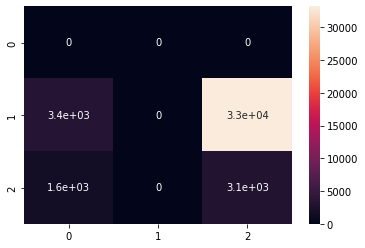

In [25]:
cf_matrix = confusion_matrix(data_matrix['class'], data_matrix['anomaly'])
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)